In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("incl/")

import narrom

In [145]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[:100:1]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [6]:
test_trajectory = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0].T
print('example trajectory loaded with shape: ', test_trajectory.shape)

example trajectory loaded with shape:  (400, 200)


In [15]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [16]:
X = test_trajectory[:-1].T
Xp = test_trajectory[1:].T

print(X.shape)
print(Xp.shape)


(200, 399)
(200, 399)


In [192]:
X = []
Xp = []
for k in range(len(trajectories)):
    X.append( trajectories[k][:-1].T )
    Xp.append( trajectories[k][1:].T )
    
X = np.concatenate(X, axis=1)
Xp = np.concatenate(Xp, axis=1)

print(X.shape)
print(Xp.shape)

(200, 399000)
(200, 399000)


In [199]:
Phi, Lambda, b = DMD(X,Xp,50)

print(Phi.shape)
print(Lambda.shape)
print(b.shape)

(200, 50)
(50, 50)
(50,)


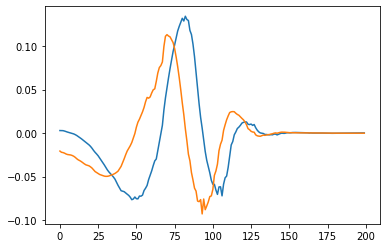

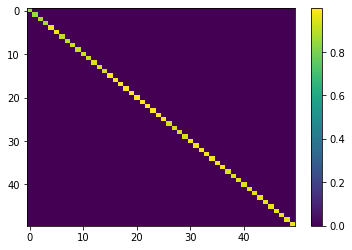

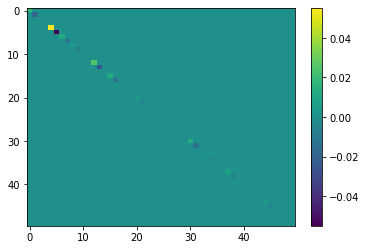

In [220]:
mode = 0

plt.plot(np.real(Phi[:,mode]))
plt.plot(np.imag(Phi[:,mode]))
plt.show()


plt.imshow(np.real(Lambda), aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(np.imag(Lambda), aspect='auto', interpolation='none')
plt.colorbar()
plt.show()


# plt.plot(np.real(b))
# plt.plot(np.imag(b))
# plt.show()


In [ ]:
k=20
x_k = Phi @ np.linalg.matrix_power(Lambda,k) @ b

plt.plot(x_k)
plt.show()

In [186]:
recon = np.zeros((200,400), dtype=complex)

for k in range(recon.shape[1]):
    recon[:,k] = Phi @ np.linalg.matrix_power(Lambda,k) @ b
    
recon = np.real(recon).T

In [ ]:
narrom.utils.plot_trajectory(recon)

narrom.utils.plot_difference(test=recon, truth=test_trajectory)

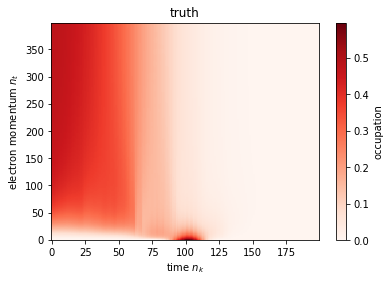

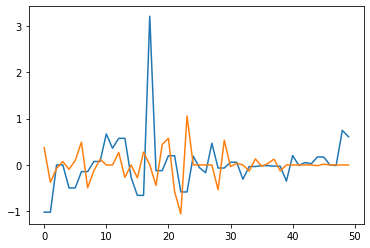

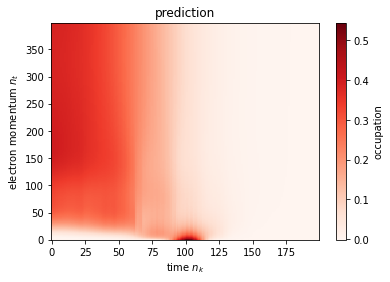

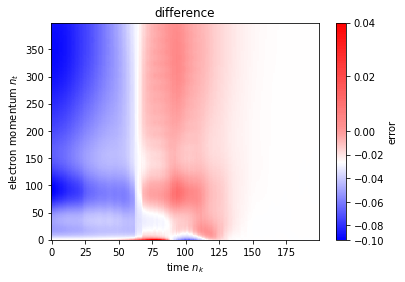

In [217]:
test = trajectories[8]

narrom.utils.plot_trajectory(test,'truth')


b_test = np.linalg.pinv(Phi) @ test[1]

plt.plot(np.real(b_test))
plt.plot(np.imag(b_test))
plt.show()

recon_test = np.zeros((200,400), dtype=complex)

for k in range(recon_test.shape[1]):
    recon_test[:,k] = Phi @ np.linalg.matrix_power(Lambda,k) @ b_test
    
recon_test = np.real(recon_test).T



narrom.utils.plot_trajectory(recon_test,'prediction')

narrom.utils.plot_difference(test=recon_test, truth=test)